---
## Decision Trees
#### Author: Tianyi Mao
---

# Part I: Student Depression Prediction using Classification

The first part of this project focuses on predicting the likelihood of depression among students using a dataset of mental health and lifestyle factors. 

This part of the project will follow a 4-step process typical of a machine learning workflow:

**Step 1**: Data Cleaning and Analysis  
**Step 2**: Train the Model  
**Step 3**: Evaluate the Model  
**Step 4**: Analyze the Results  

### **Step 1: Data Cleaning and Analysis**  
- Load the dataset and perform an initial exploration.  
- Handle missing values by imputing the median for numerical features.  
- Encode categorical features using **Label Encoding** to ensure compatibility with the Decision Tree model.  
- Split the data into **training** and **testing** sets (60/40 split).  

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.tree import export_text, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64
   Gender   Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0       1  33.0                5.0            0.0  8.97                 2.0   
1       0  24.0                2.0            0.0  5.90

/var/folders/1h/pt2dqtvd0_733mkpkbgbr4tr0000gn/T/ipykernel_68865/3376086611.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Financial Stress'].fillna(data['Financial Stress'].median(), inplace=True)


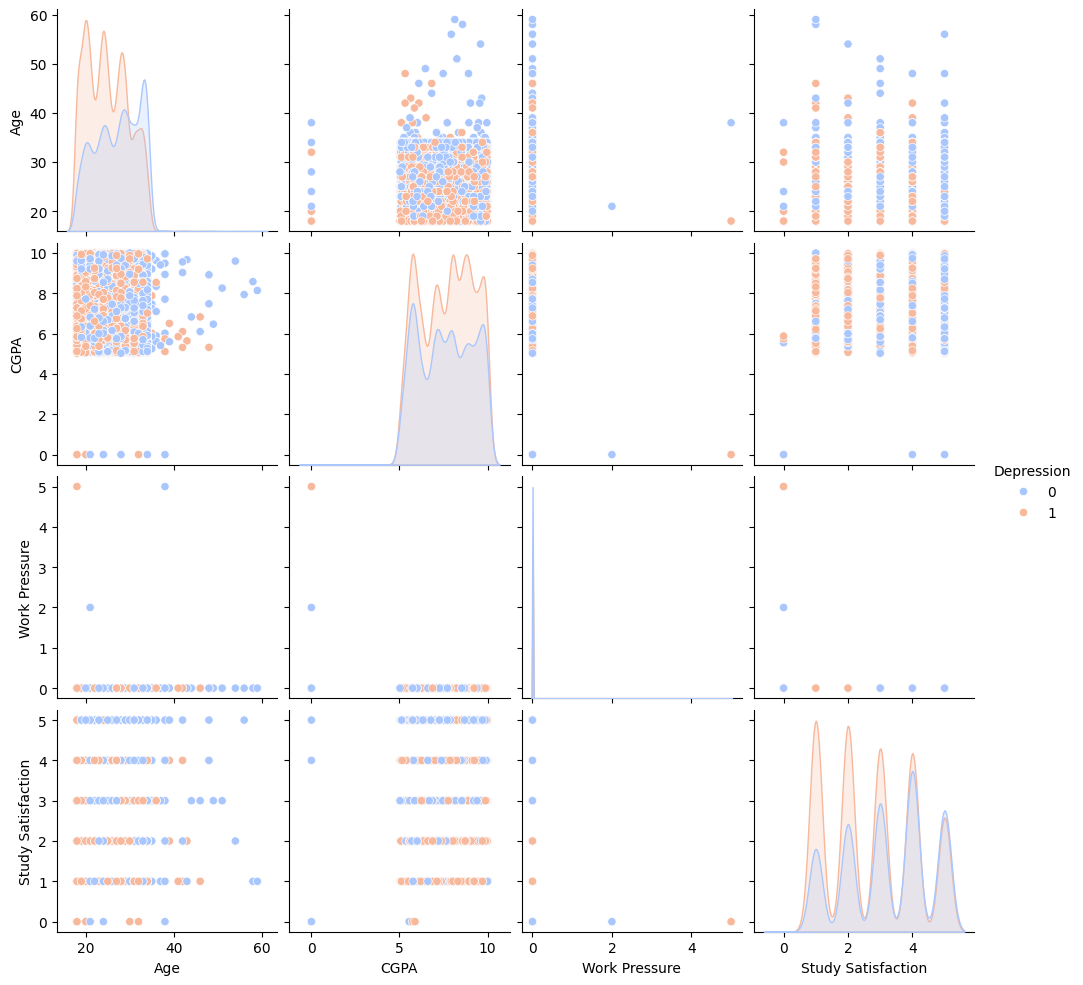

In [11]:
#Load data
file_path = "/Users/sherrymao/Documents/Git/INDE577-TianyiMao/Data/Depression_data/Student Depression Dataset.csv"  # Update the path if needed
data = pd.read_csv(file_path)

#print(data.head())

missing_values = data.isnull().sum()
print(missing_values)

# Drop irrelevant columns like 'id'
data = data.drop(columns=['id', 'City', 'Profession'])  # 'City' and 'Profession' might have too many unique values

# Encode categorical variables using LabelEncoder
label_enc_cols = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Degree',
                  'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

le = LabelEncoder()
for col in label_enc_cols:
    data[col] = le.fit_transform(data[col])

# Check for missing values and handle them
data['Financial Stress'].fillna(data['Financial Stress'].median(), inplace=True)

# Features (X) and target (y)
X = data.drop(columns=['Depression'])
y = data['Depression']

# Display processed data
print(data.head())

# Select only numeric columns for pairplot
selected_features = ['Age', 'CGPA', 'Work Pressure', 'Study Satisfaction', 'Depression']
numeric_features = data[selected_features].select_dtypes(include=['float64', 'int64']).columns

# Pairplot for numeric features
sns.pairplot(data[numeric_features], hue='Depression', palette='coolwarm', diag_kind='kde')
plt.show()

### **Step 2: Train the Model**  
- Train the Decision Tree model using the **Gini Index** to measure splits.  
- Set hyperparameters such as `max_depth` to prevent overfitting.  
- Fit the model on the training data.

In [12]:
# Split the dataset into training and testing sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the Decision Tree Classifier
decision_tree_clf = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)

# Train the model
decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### **Step 3: Test the Model**  
- Evaluate the model on the test set by predicting depression status.  
- Measure performance using metrics like:  
   - **Accuracy**: The proportion of correctly predicted instances.  
   - **Confusion Matrix**: To visualize correct and incorrect predictions.  
   - **Classification Report**: Providing precision, recall, and F1-score for both classes.  


Model Evaluation:
Accuracy: 0.82

Confusion Matrix:
[[3663  985]
 [1040 5473]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      4648
           1       0.85      0.84      0.84      6513

    accuracy                           0.82     11161
   macro avg       0.81      0.81      0.81     11161
weighted avg       0.82      0.82      0.82     11161



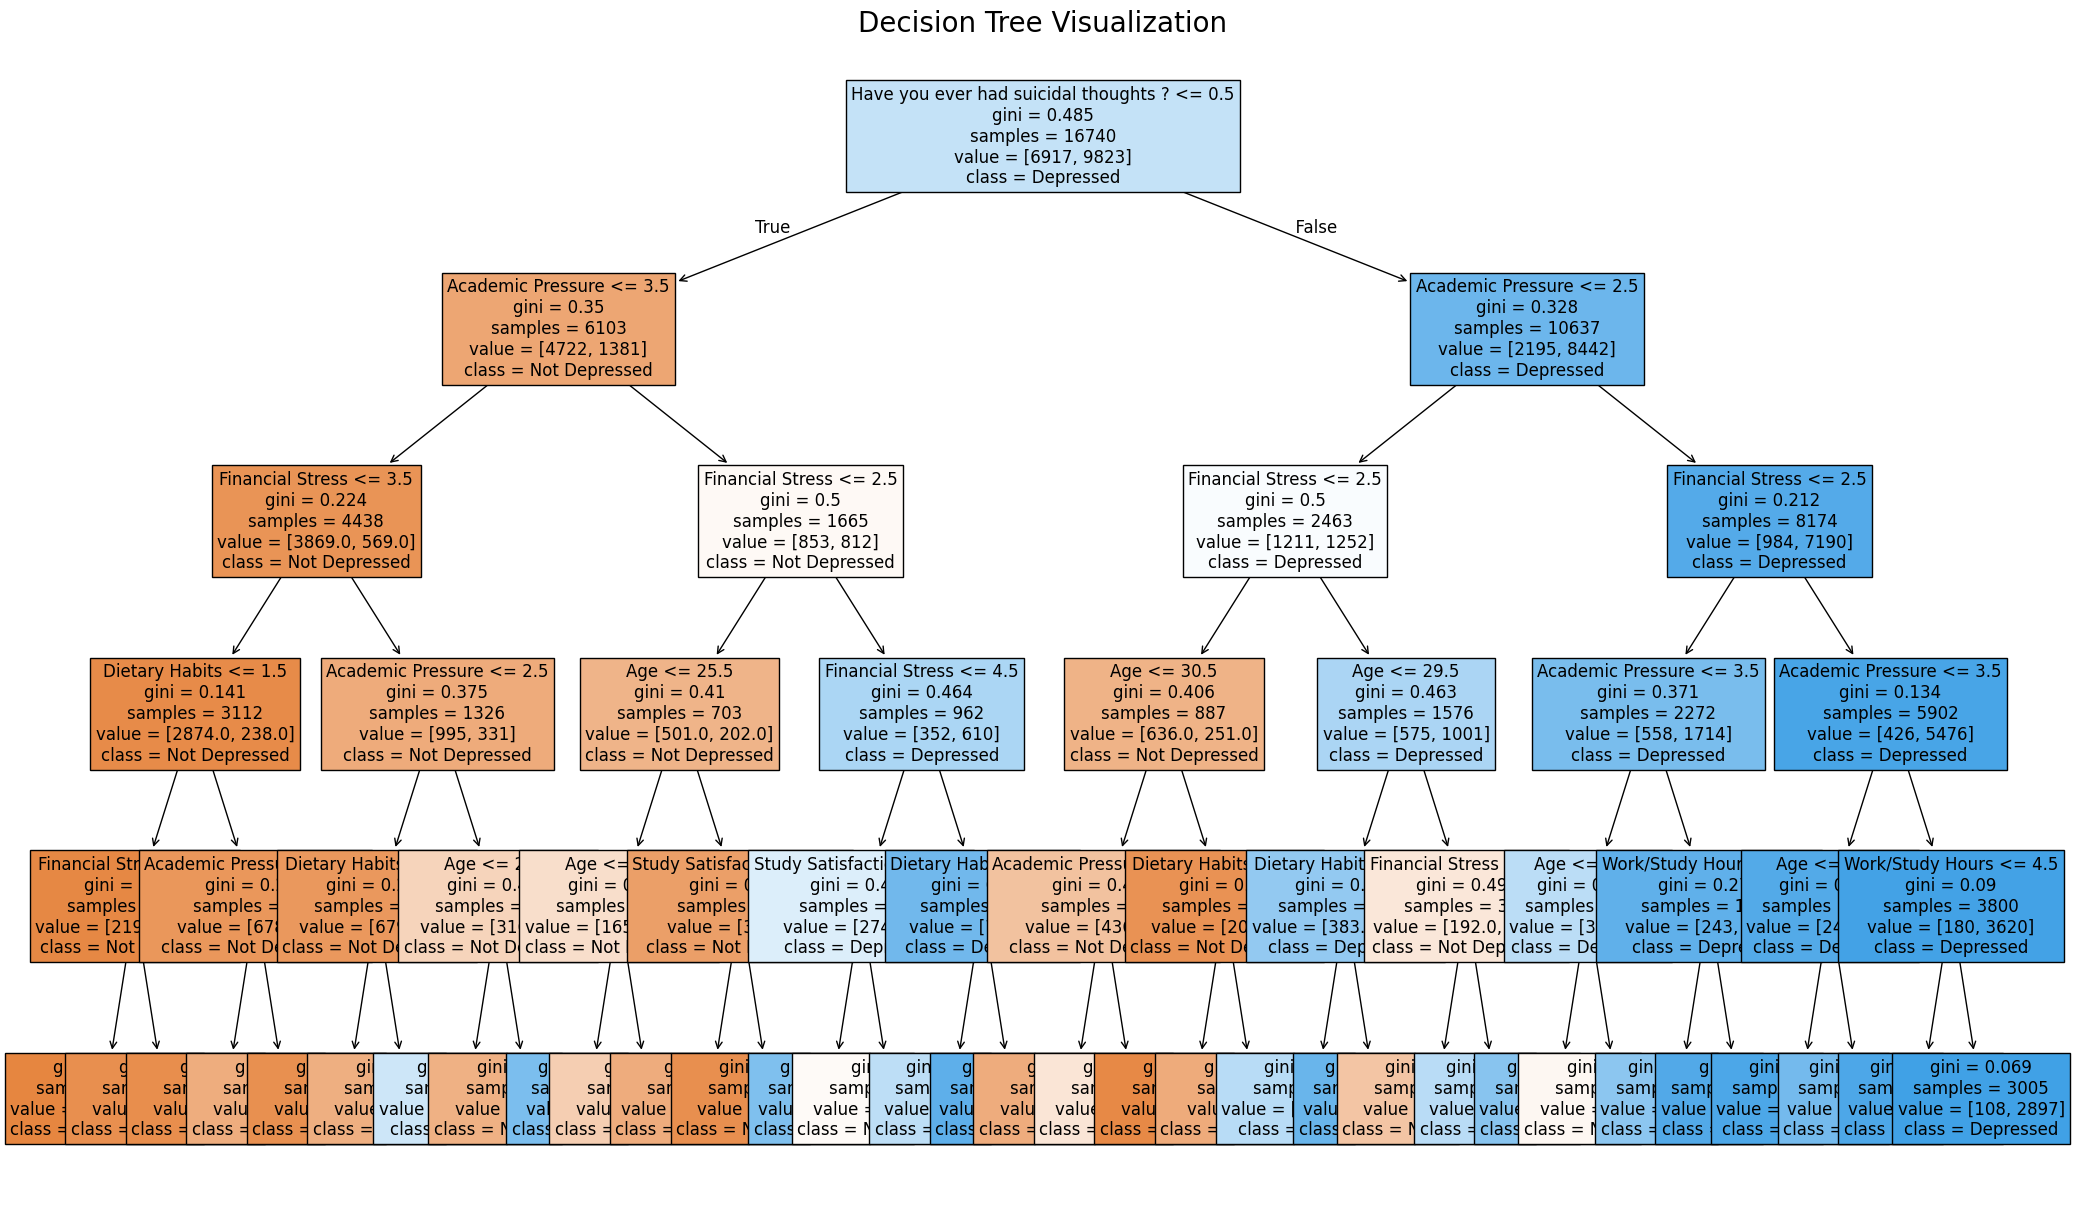

Decision Tree Rules:

|--- Have you ever had suicidal thoughts ? <= 0.50
|   |--- Academic Pressure <= 3.50
|   |   |--- Financial Stress <= 3.50
|   |   |   |--- Dietary Habits <= 1.50
|   |   |   |   |--- Financial Stress <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Financial Stress >  2.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Dietary Habits >  1.50
|   |   |   |   |--- Academic Pressure <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Academic Pressure >  2.50
|   |   |   |   |   |--- class: 0
|   |   |--- Financial Stress >  3.50
|   |   |   |--- Academic Pressure <= 2.50
|   |   |   |   |--- Dietary Habits <= 2.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Dietary Habits >  2.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- Academic Pressure >  2.50
|   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  24.50
|   |   |   |   |   |--- class: 0
|   |--- Academic Pressure >  3.50
|

In [13]:
# Make predictions on the test set
y_pred = decision_tree_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize the Decision Tree
plt.figure(figsize=(25, 15)) 
plot_tree(
    decision_tree_clf,
    feature_names=X.columns,
    class_names=["Not Depressed", "Depressed"],
    filled=True,
    fontsize=12  # Adjust font size for node labels
)
plt.title("Decision Tree Visualization", fontsize=20)  # Increase title font size
plt.show()

# Export the decision tree rules as text
tree_rules = export_text(
    decision_tree_clf,  # The trained decision tree model
    feature_names=list(X.columns)  # Use the feature names from the dataset
)
print("Decision Tree Rules:\n")
print(tree_rules, "\n")


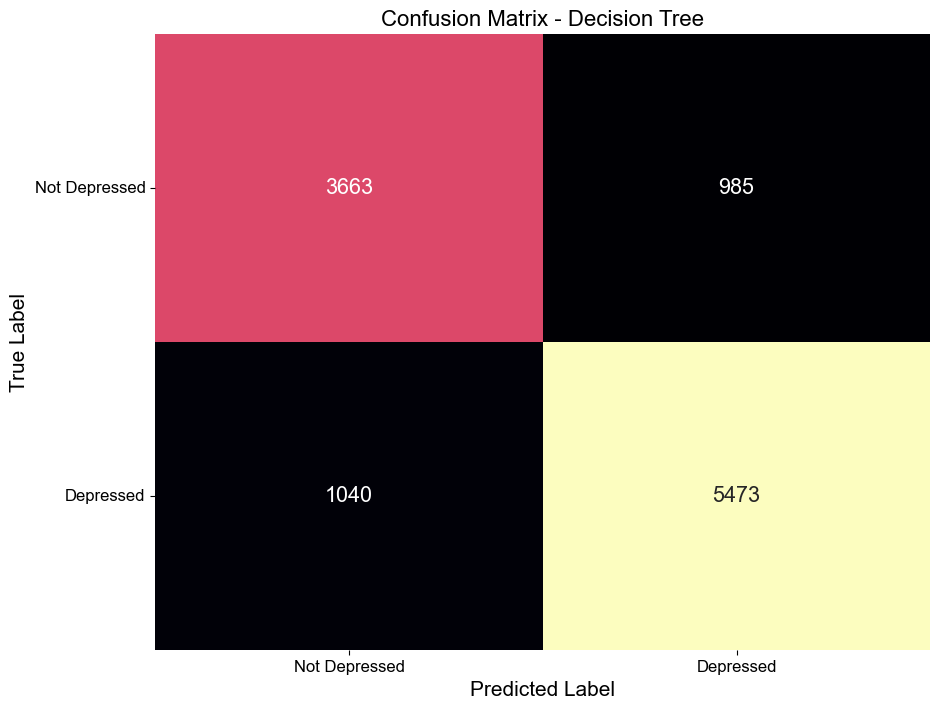

In [14]:
# Predicted values on the testing data
test_pred_decision_tree = decision_tree_clf.predict(X_test)

# Generate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into a DataFrame for better visualization
matrix_df = pd.DataFrame(confusion_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(
    matrix_df,
    annot=True, 
    fmt="g",
    ax=ax, 
    cmap="magma",  # Color scheme
    cbar=False     # Disable color bar
)

# Add title and labels
ax.set_title("Confusion Matrix - Decision Tree", fontsize=16)
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["Not Depressed", "Depressed"], fontsize=12)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["Not Depressed", "Depressed"], rotation=0, fontsize=12)
plt.show()


### **Step 4: Analyze the Results**  
- Summarize the model's performance metrics.  
- Interpret the results, including precision, recall, and overall accuracy.  
- Analyze the **Decision Tree structure** for feature importance.  



| Class                  | Precision | Recall | F1-Score | Support |
|------------------------|-----------|--------|----------|---------|
| **Not Depressed (0)**  | 0.78      | 0.79   | 0.78     | 4,648   |
| **Depressed (1)**      | 0.85      | 0.84   | 0.84     | 6,513   |
| **Overall Accuracy**   |           |        | **0.82** | 11,161  |
 

The model achieved an overall accuracy of 82%. The model is reasonably successful to classify students as either "depressed" or "not depressed". 

Based on the confusion matrix, 4,648 students were labeled as "not depressed." The model correctly identified 3,663 but misclassified 985 as "depressed." Out of 6,513 students who were labeled as "depressed," the model correctly predicted 5,473 while misclassifying 1,040 as "not depressed." These results point to that the model is slightly better at identifying students who had depression. 

For students labeled as "not depressed," the precision was 0.78 and the recall was 0.79. For students labeled as "depressed," the precision was higher at 0.85, with a recall of 0.84. The overall weighted average F1-score of 0.82 reflects balanced performance across both groups.

The decision tree was limited to a maximum depth of 5. The decision rules further illustrate major drives for students' depression. Suicidal thoughts emerged as the strongest predictor, followed by academic pressure and financial stress. These are pretty much expected since stress and mental health challenges are common contributors to depression. Other factors such as dietary habits and age also played a role in distinguishing between the two groups. For example, younger students under significant academic or financial pressure were more likely to be classified as "depressed."

# Part II: Student GPT Prediction using Regression

The second part of this project focus on predicting students' cumulative GPA, which is an numberical outcome from the same dataset. 

This part will also follow a 4-step process typical of a machine learning workflow:

**Step 1**: Data Cleaning and Analysis  
**Step 2**: Train the Model  
**Step 3**: Evaluate the Model  
**Step 4**: Interpret the Results

## Step 1: Data Preparation  
The dataset used is the *Student Depression Dataset*. For this regression task, the **CGPA (Cumulative Grade Point Average)** is selected as the target variable, while predictors include features such as **Academic Pressure**, **Work Pressure**, **Sleep Duration**, **Study Satisfaction**, **Dietary Habits**, and **Financial Stress**. 
- Missing values, if any, are handled by imputing the median for both predictor variables and the target variable. 
- The dataset is then split into **training** (70%) and **testing** (30%) subsets.

---

In [15]:
# Select features and target variable
X = data[['Academic Pressure', 'Work Pressure', 'Sleep Duration', 
          'Study Satisfaction', 'Dietary Habits', 'Financial Stress']]
y = data['CGPA']  # Target variable: Cumulative Grade Point Average

# Handle missing values (if any)
X = X.fillna(X.median())
y = y.fillna(y.median())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 2: Train Regression Tree  
Two regression trees are built using the **DecisionTreeRegressor** model:  
- **Shallow Tree** with a maximum depth of 1.  
- **Deep Tree** with a maximum depth of 20.  

The shallow tree serves as a baseline model, while the deep tree explores more variability in the data.

---

In [19]:
# Train shallow regression tree (depth=1)
reg1 = DecisionTreeRegressor(max_depth=1, random_state=42)
reg1.fit(X_train, y_train)
y_pred_reg1 = reg1.predict(X_test)

# Train deeper regression tree (depth=20)
reg2 = DecisionTreeRegressor(max_depth=20, random_state=42)
reg2.fit(X_train, y_train)
y_pred_reg2 = reg2.predict(X_test)


## Step 3: Model Evaluation  
 **Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)** are used to evaluate model performance on the test data.  
- **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values.  
- **Mean Absolute Error (MAE):** Measures the average absolute difference between actual and predicted values.  

In [ ]:
# Evaluate shallow tree (depth=1)
mse_reg1 = mean_squared_error(y_test, y_pred_reg1)
mae_reg1 = mean_absolute_error(y_test, y_pred_reg1)
print(f"Shallow Tree (depth=1): MSE = {mse_reg1:.2f}, MAE = {mae_reg1:.2f}")

# Evaluate deep tree (depth=20)
mse_reg2 = mean_squared_error(y_test, y_pred_reg2)
mae_reg2 = mean_absolute_error(y_test, y_pred_reg2)
print(f"Deep Tree (depth=20): MSE = {mse_reg2:.2f}, MAE = {mae_reg2:.2f}")


Shallow Tree (depth=1): MSE = 2.14, MAE = 1.27
Deep Tree (depth=20): MSE = 2.33, MAE = 1.30


## Step 4: Analyze Results  
- A scatter plot of **Actual CGPA vs. Predicted CGPA** is generated for both the shallow and deep regression trees. 

- The resulting errors (MSE and MAE) for both models are also compared.

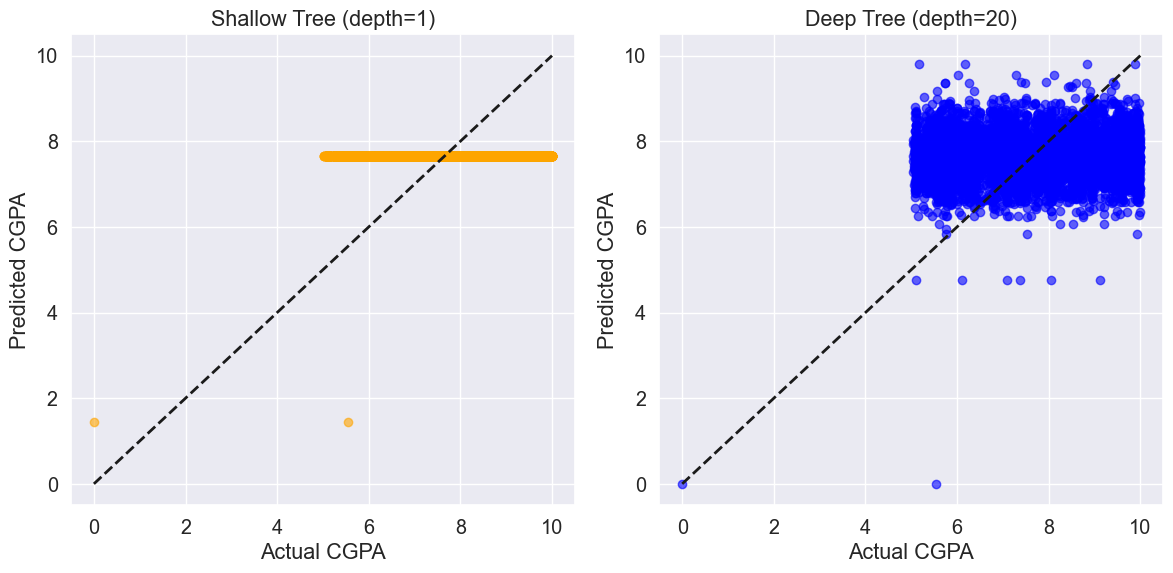

In [20]:
# Plot predicted vs actual values for both models
plt.figure(figsize=(12, 6))

# Shallow Tree
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_reg1, color="orange", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Shallow Tree (depth=1)")
plt.xlabel("Actual CGPA")
plt.ylabel("Predicted CGPA")

# Deep Tree
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_reg2, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Deep Tree (depth=20)")
plt.xlabel("Actual CGPA")
plt.ylabel("Predicted CGPA")

plt.tight_layout()
plt.show()

- **Shallow Tree (depth=1):**  
  - MSE = **2.14**  
  - MAE = **1.27**  
- **Deep Tree (depth=20):**  
  - MSE = **2.33**  
  - MAE = **1.30**
 
The MSE and MAE results indicate that the shallow tree outperformed the deep tree slightly. 

The shallow tree model predicts the same value for most data points, regardless of the actual CGPA. According to the graph on the left, the predictions are clustered around a flat horizontal line. The deep tree model attempts to fit the data more closely as the points scatter more widely and cover the vertical range, but many predictions still fail to align with the diagonal line of y = x.Since neither plot shows a strong linear relationship between predicted and actual CGP. This might suggest that decision trees alone may not be ideal for this task without proper tuning. 